In [1]:
# Importing dependencies

import cv2
from matplotlib import pyplot as plt

Image shape :  (1300, 1600)


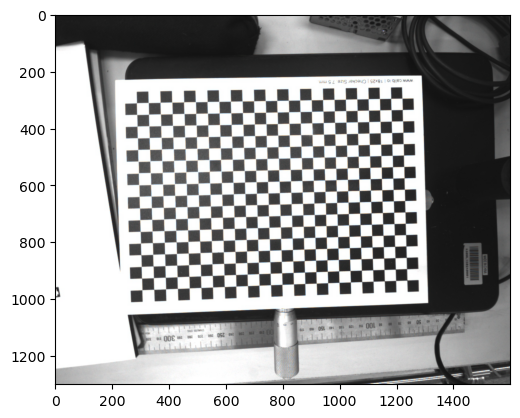

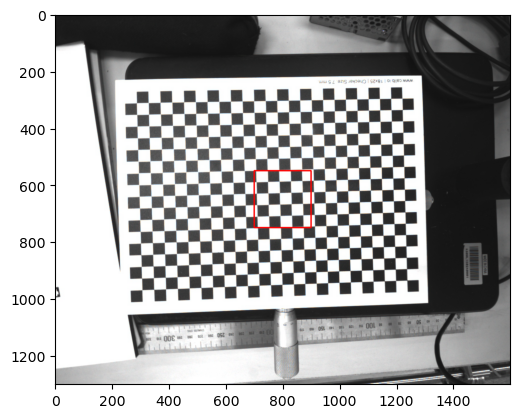

In [24]:
# load source images & measure 
from cv2 import COLOR_RGB2GRAY

# load image
source = cv2.imread("./sharpness_source.jpg")
source_gray = cv2.cvtColor(source, COLOR_RGB2GRAY)
h, w = source_gray.shape
roi_size = 200

print("Image shape : ", source_gray.shape)
plt.imshow(source)
plt.show()

# target area
target_source = cv2.rectangle(source, (int(w/2-roi_size/2), int(h/2-roi_size/2)), (int(w/2+roi_size/2), int(h/2+roi_size/2)), (255,0,0), 3)
plt.clf()
plt.imshow(target_source)
plt.show()

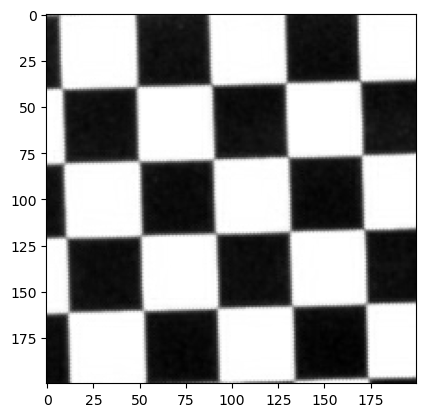

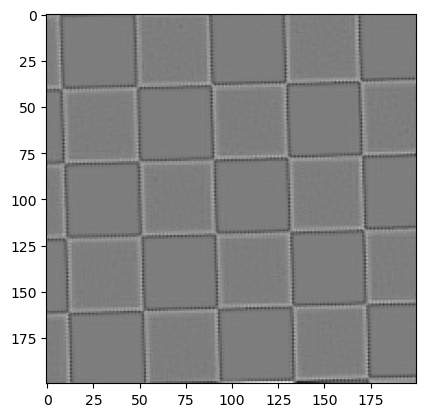

[[0.03355]]
[[79.91834066]]
[[6386.9411744]]


In [32]:
# select target area
cropped_img = source_gray[int(h/2-roi_size/2): int(h/2+roi_size/2), int(w/2-roi_size/2): int(w/2+roi_size/2)]
plt.clf()
plt.imshow(cropped_img, cmap="gray")
plt.show()

laplacian = cv2.Laplacian(cropped_img, cv2.CV_64F, ksize=3) #laplacian edge
plt.clf()
plt.imshow(laplacian, cmap="gray")
plt.show()

mean, std = cv2.meanStdDev(laplacian)
print(mean)
print(std)
fm = std*std
print(fm)


Image shape :  (1200, 1600)


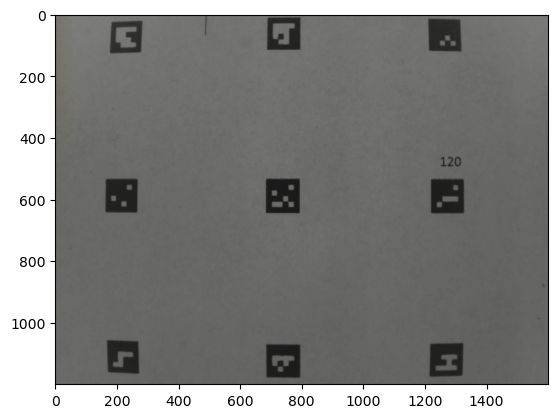

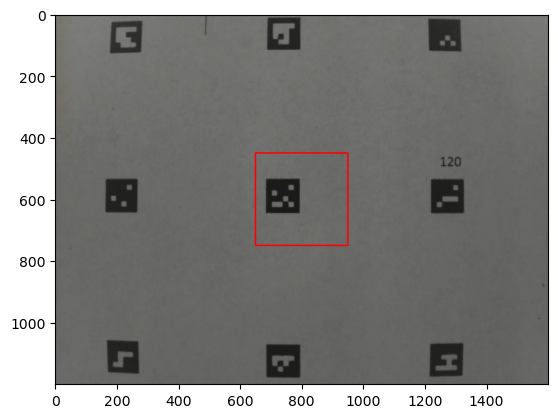

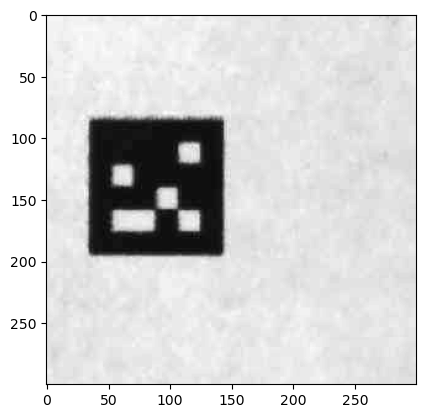

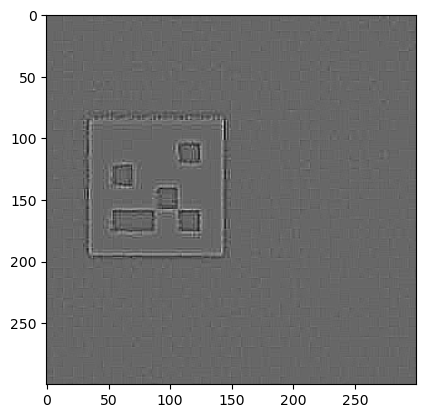

[[-0.00397778]]
[[12.25047599]]
[[150.07416196]]


In [55]:
# load source images & measure 
from cv2 import COLOR_RGB2GRAY

# load image
source = cv2.imread("../data/sharpness/200.jpg")
source_gray = cv2.cvtColor(source, COLOR_RGB2GRAY)
h, w = source_gray.shape
roi_size = 300

print("Image shape : ", source_gray.shape)
plt.imshow(source)
plt.show()

# target area
target_source = cv2.rectangle(source, (int(w/2-roi_size/2), int(h/2-roi_size/2)), (int(w/2+roi_size/2), int(h/2+roi_size/2)), (255,0,0), 3)
plt.clf()
plt.imshow(target_source)
plt.show()

cropped_img = source_gray[int(h/2-roi_size/2): int(h/2+roi_size/2), int(w/2-roi_size/2): int(w/2+roi_size/2)]
plt.clf()
plt.imshow(cropped_img, cmap="gray")
plt.show()

laplacian = cv2.Laplacian(cropped_img, cv2.CV_64F, ksize=3) #laplacian edge
plt.clf()
plt.imshow(laplacian, cmap="gray")
plt.show()

mean, std = cv2.meanStdDev(laplacian)
print(mean)
print(std)
fm = std*std
print(fm)

Image shape :  (1200, 1600)


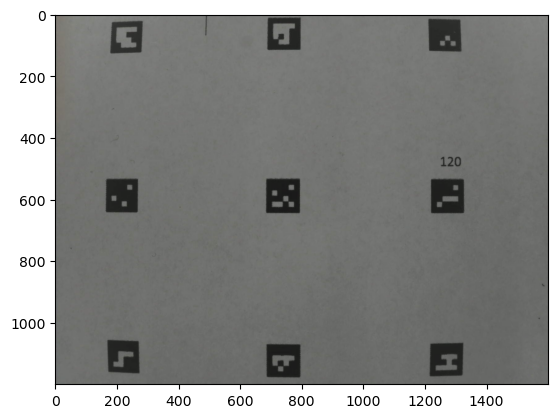

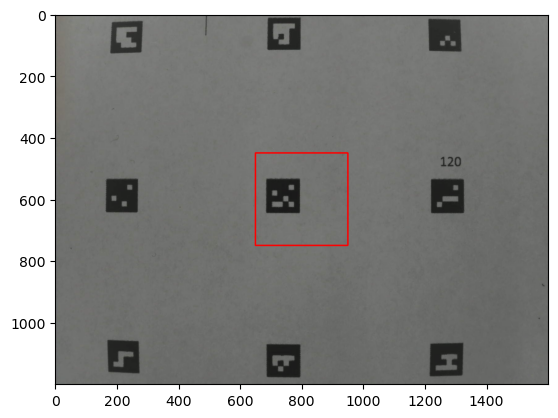

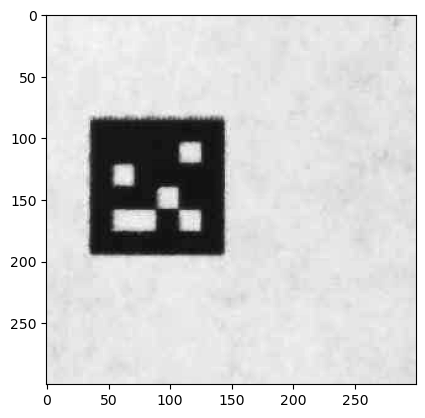

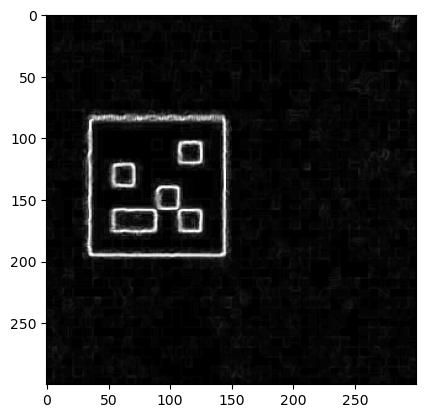

[[11.69317778]]
[[32.01687114]]
[[1025.0800379]]


In [79]:
# load source images & measure 
from cv2 import COLOR_RGB2GRAY

# load image
source = cv2.imread("../data/sharpness/175.jpg")
source_gray = cv2.cvtColor(source, COLOR_RGB2GRAY)
h, w = source_gray.shape
roi_size = 300

print("Image shape : ", source_gray.shape)
plt.imshow(source)
plt.show()

# target area
target_source = cv2.rectangle(source, (int(w/2-roi_size/2), int(h/2-roi_size/2)), (int(w/2+roi_size/2), int(h/2+roi_size/2)), (255,0,0), 3)
plt.clf()
plt.imshow(target_source)
plt.show()

cropped_img = source_gray[int(h/2-roi_size/2): int(h/2+roi_size/2), int(w/2-roi_size/2): int(w/2+roi_size/2)]
plt.clf()
plt.imshow(cropped_img, cmap="gray")
plt.show()


img_sobel_x = cv2.Sobel(cropped_img, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
img_sobel_y = cv2.Sobel(cropped_img, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)
img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0)

plt.clf()
plt.imshow(img_sobel, cmap="gray")
plt.show()

mean, std = cv2.meanStdDev(img_sobel)
print(mean)
print(std)
fm = std*std
print(fm)

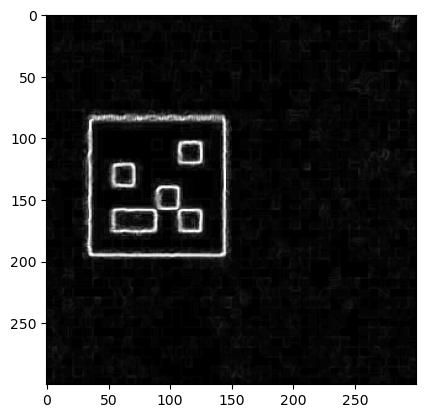

[[11.69317778]]
[[32.01687114]]
[[1025.0800379]]


In [81]:
# sobel method
img_sobel_x = cv2.Sobel(cropped_img, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(cropped_img, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)


img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0)

plt.clf()
plt.imshow(img_sobel, cmap="gray")
plt.show()

mean, std = cv2.meanStdDev(img_sobel)
print(mean)
print(std)
fm = std*std
print(fm)

              0
0    249.922112
1    250.639531
2    247.649893
3    251.429024
4    249.642790
..          ...
445  248.923877
446  250.966723
447  251.881042
448  251.960787
449  250.508014

[450 rows x 1 columns]
mean :  0    250.619822
dtype: float64
std :  0    1.264311
dtype: float64


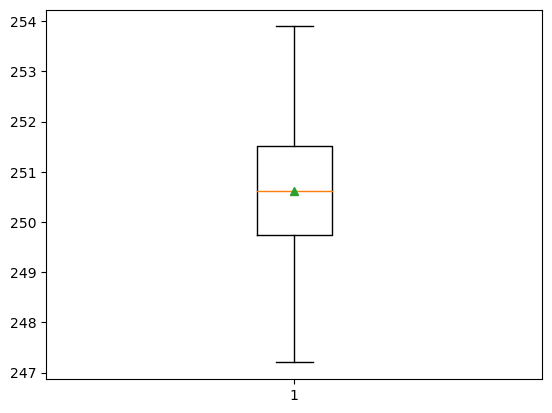

In [15]:
from matplotlib import pyplot as plt
import pandas as pd

pd.set_option('display.max.colwidth', 50)
pd.set_option('display.width', 1000)

data = pd.read_csv("../bin/log_100.csv", header=None)
print(data)
print("mean : ", data.mean(axis=0))
print("std : ", data.std())

plt.clf()
plt.boxplot(data, showmeans=True)
plt.show()
